# 6.5 Machine Learning

## 1.Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# Define path

path = r'C:\Users\paulo\OneDrive\USA Education\Career Foundry\Data Analysis\Modulo 07 - Dashboard\Flavors of Cacao Project'

In [5]:
# Import data

df_flavors_cacao = pd.read_csv(os.path.join(path, '02 - Data', 'Prepare data', 'flavors_of_cacao_rating_category.csv'), index_col = False)

In [6]:
df_flavors_cacao.shape

(1795, 10)

In [7]:
df_flavors_cacao.head()

,company_name,origin_bean_bar_name,REF,review_year,cocoa_percent,company_location,rating,bean_type,bean_country_origin,rating_category
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Unknown,Sao Tome & Principe,High rating
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Unknown,Togo,Medium rating
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Unknown,Togo,Medium rating
3,A. Morin,Akata,1680,2015,70%,France,3.50,Unknown,Togo,High rating
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Unknown,Peru,High rating


## 2. Converting categorical columns into numerical

In [13]:
df_flavors_cacao_numeric = df_flavors_cacao.select_dtypes(include=['int', 'float'])

In [14]:
# Create a correlation matrix using pandas

df_flavors_cacao_numeric.corr()

,REF,review_year,rating
REF,1.000000,0.985076,0.101030
review_year,0.985076,1.000000,0.099846
rating,0.101030,0.099846,1.000000


## 3. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df_flavors_cacao_numeric).score(df_flavors_cacao_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

[-548411680.7137185,
 -140162407.66959015,
 -62996851.84678664,
 -34992058.252235234,
 -22300742.249961838,
 -15684919.811226323,
 -11365812.24805604,
 -8750984.097500684,
 -6970191.217704203]

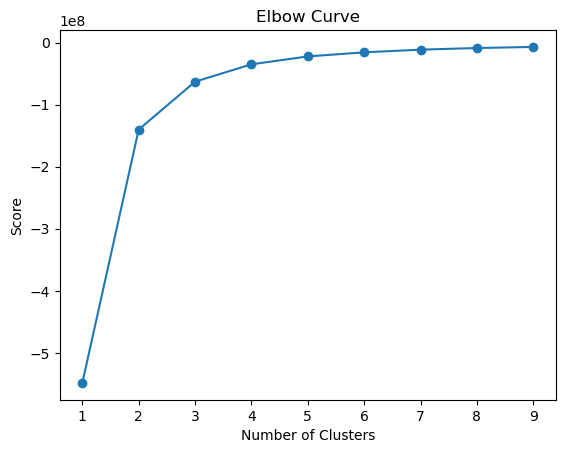

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  For this elbow curve, there's a large jump from two to two on the y-axis, but after that, the curve straightens out. For that, I have chosen the optimal count for clusters as four.

## 4. k-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_flavors_cacao_numeric)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
df_flavors_cacao_numeric['clusters'] = kmeans.fit_predict(df_flavors_cacao_numeric)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df_flavors_cacao_numeric.head()

,REF,review_year,rating,clusters
0,1876,2016,3.75,0
1,1676,2015,2.75,0
2,1676,2015,3.00,0
3,1680,2015,3.50,0
4,1704,2015,3.50,0


In [29]:
df_flavors_cacao_numeric['clusters'].value_counts()

clusters
3    483
1    454
0    448
2    410
Name: count, dtype: int64

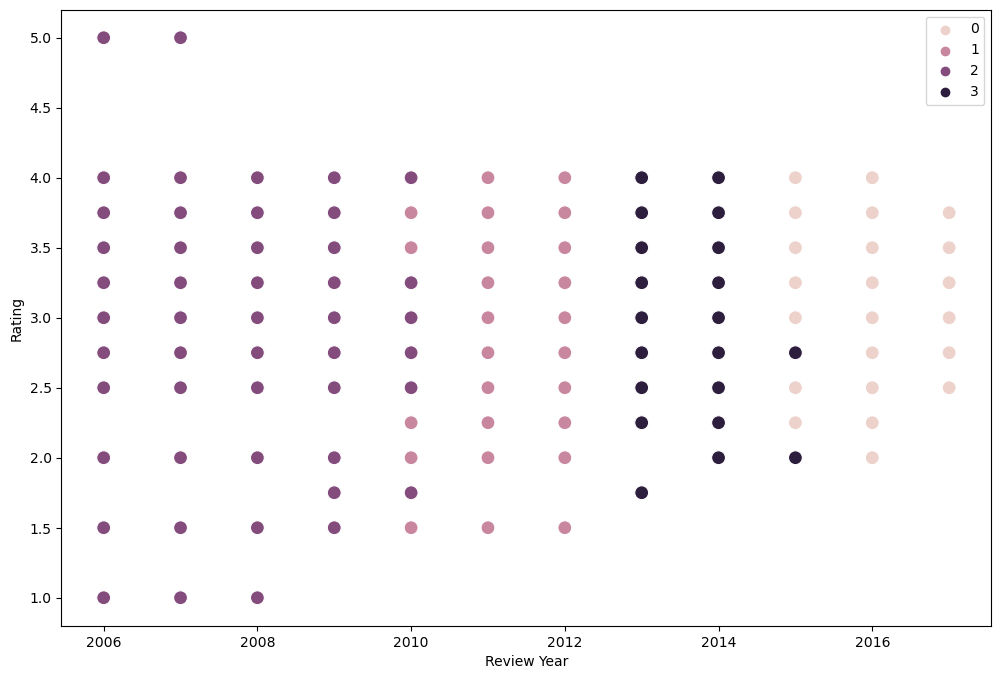

In [30]:
# Plot the clusters for the "Review Year" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_flavors_cacao_numeric['review_year'], y=df_flavors_cacao_numeric['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Year') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

#### Unfortunately, the data set I have chosen, did not have many numerical values to play around with ML algorithms. However, we can see that, mostly the clusters were separated by year and rating. 

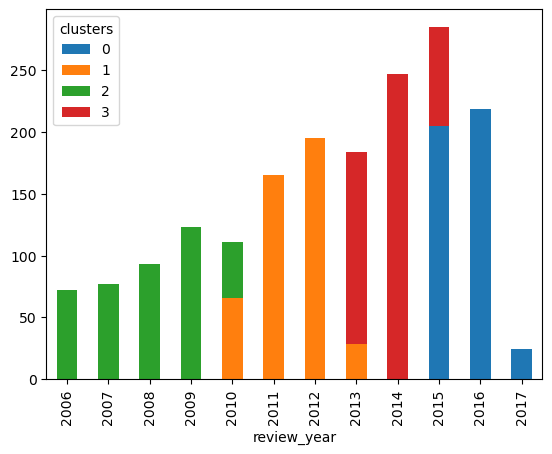

In [69]:
#Checking the Value counts to see if there are majority divided
# per year
df_clusters_year = df_flavors_cacao_numeric.groupby(['review_year','clusters']).size().unstack().plot(kind='bar', stacked=True)

#### This bar chart is to represent the division of clusters per year. Looks like they were separated as year goes by

In [77]:
# Define colors for each cluster

df_flavors_cacao_numeric.loc[df_flavors_cacao_numeric['clusters'] == 3, 'cluster'] = 'dark blue'
df_flavors_cacao_numeric.loc[df_flavors_cacao_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_flavors_cacao_numeric.loc[df_flavors_cacao_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_flavors_cacao_numeric.loc[df_flavors_cacao_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [72]:
df_flavors_cacao_numeric.dtypes

REF              int64
review_year      int64
rating         float64
clusters         int32
cluster         object
dtype: object

In [73]:
df_flavors_cacao_numeric['cluster'].value_counts()

cluster
dark blue      483
purple         454
pink           448
dark purple    410
Name: count, dtype: int64

In [78]:
# Calculating mean, median and max for clusters

df_flavors_cacao_numeric.groupby('cluster').agg({'REF':['mean', 'median'], 
                         'review_year':['mean', 'median'], 
                         'rating':['mean', 'median']})

REF          review_year            rating       
                    mean  median         mean  median      mean median
cluster                                                               
dark blue    1278.329193  1279.0  2013.842650  2014.0  3.191511   3.25
dark purple   266.997561   267.5  2007.980488  2008.0  3.098780   3.00
pink         1728.526786  1728.0  2015.595982  2016.0  3.243862   3.25
purple        788.914097   789.0  2011.407489  2011.0  3.201542   3.25